In [3]:
import json
import time
import os
import glob
import os.path as osp
import numpy as np
import pandas as pd
import torch

os.chdir('/VOLUME/nia_vent_asynchrony')

In [4]:
import module.utils as cutils

In [5]:
org = 'snu'
# org = 'aju'

In [7]:
label_path = '/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/label/annotations_2022_NIA_MV_AUMC.json'
label = cutils.load_json(label_path)

label_path = {'snu': '/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/label/서울대_1차_100명(201-300)_result_data_20220920_1.json',
'aju': '/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/label/아주대_1차_50명(092-162)_result_data_20220920_1.json'}[org]
print(org, label_path)

with open(label_path, 'r') as f:
    data = f.readlines()

snu /VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/label/서울대_1차_100명(201-300)_result_data_20220920_1.json


In [8]:
label_df = pd.concat([pd.Series(eval(i)).to_frame().transpose() for i in data])

In [9]:
label_df

,name_VentilatorWeaning,csv_path_PRESSURE,wav_result_PRESSURE,csv_path_FLOW,wav_result_FLOW
0,"[""false""]",1-202/AWP/1-202-002.csv,"[{""startTime"": 512.0102400000001, ""endTime"": 5...",1-202/AWF/1-202-002.csv,"[{""startTime"": 512.0102400000001, ""endTime"": 5..."
0,"[""success""]",1-206/AWP/1-206-013.csv,"[{""startTime"": 424.00848, ""endTime"": 431.99197...",1-206/AWF/1-206-013.csv,"[{""startTime"": 424.00848, ""endTime"": 431.99197..."
0,"[""false""]",1-217/AWP/1-217-004.csv,"[{""startTime"": 824.01648, ""endTime"": 831.99997...",1-217/AWF/1-217-004.csv,"[{""startTime"": 824.01648, ""endTime"": 831.99997..."
0,"[""false""]",1-211/AWP/1-211-004.csv,"[{""startTime"": 1264.008613, ""endTime"": 1271.99...",1-211/AWF/1-211-004.csv,"[{""startTime"": 1264.008613, ""endTime"": 1271.99..."
0,"[""false""]",1-212/AWP/1-212-020.csv,"[{""startTime"": 1744.0015460000002, ""endTime"": ...",1-212/AWF/1-212-020.csv,"[{""startTime"": 1744.0015460000002, ""endTime"": ..."
...,...,...,...,...,...
0,"[""false""]",1-300/AWP/1-300-139.csv,"[{""startTime"": 392.00784000000004, ""endTime"": ...",1-300/AWF/1-300-139.csv,"[{""startTime"": 392.00784000000004, ""endTime"": ..."
0,"[""false""]",1-300/AWP/1-300-140.csv,"[{""startTime"": 552.01104, ""endTime"": 559.99453...",1-300/AWF/1-300-140.csv,"[{""startTime"": 552.01104, ""endTime"": 559.99453..."
0,"[""false""]",1-300/AWP/1-300-141.csv,"[{""startTime"": 128.00256000000002, ""endTime"": ...",1-300/AWF/1-300-141.csv,"[{""startTime"": 128.00256000000002, ""endTime"": ..."
0,"[""false""]",1-300/AWP/1-300-142.csv,"[{""startTime"": 672.0134400000001, ""endTime"": 6...",1-300/AWF/1-300-142.csv,"[{""startTime"": 672.0134400000001, ""endTime"": 6..."


In [10]:
def transform_row_p(csv_path_PRESSURE, wav_result_PRESSURE):
    tmp = pd.DataFrame(eval(wav_result_PRESSURE))
    tmp['csv_path_PRESSURE'] = csv_path_PRESSURE
    return tmp

def transform_row_f(csv_path_FLOW, wav_result_FLOW):
    tmp2 = pd.DataFrame(eval(wav_result_FLOW))
    tmp2['csv_path_FLOW'] = csv_path_FLOW    
    return tmp2

In [11]:
label_df

,name_VentilatorWeaning,csv_path_PRESSURE,wav_result_PRESSURE,csv_path_FLOW,wav_result_FLOW
0,"[""false""]",1-202/AWP/1-202-002.csv,"[{""startTime"": 512.0102400000001, ""endTime"": 5...",1-202/AWF/1-202-002.csv,"[{""startTime"": 512.0102400000001, ""endTime"": 5..."
0,"[""success""]",1-206/AWP/1-206-013.csv,"[{""startTime"": 424.00848, ""endTime"": 431.99197...",1-206/AWF/1-206-013.csv,"[{""startTime"": 424.00848, ""endTime"": 431.99197..."
0,"[""false""]",1-217/AWP/1-217-004.csv,"[{""startTime"": 824.01648, ""endTime"": 831.99997...",1-217/AWF/1-217-004.csv,"[{""startTime"": 824.01648, ""endTime"": 831.99997..."
0,"[""false""]",1-211/AWP/1-211-004.csv,"[{""startTime"": 1264.008613, ""endTime"": 1271.99...",1-211/AWF/1-211-004.csv,"[{""startTime"": 1264.008613, ""endTime"": 1271.99..."
0,"[""false""]",1-212/AWP/1-212-020.csv,"[{""startTime"": 1744.0015460000002, ""endTime"": ...",1-212/AWF/1-212-020.csv,"[{""startTime"": 1744.0015460000002, ""endTime"": ..."
...,...,...,...,...,...
0,"[""false""]",1-300/AWP/1-300-139.csv,"[{""startTime"": 392.00784000000004, ""endTime"": ...",1-300/AWF/1-300-139.csv,"[{""startTime"": 392.00784000000004, ""endTime"": ..."
0,"[""false""]",1-300/AWP/1-300-140.csv,"[{""startTime"": 552.01104, ""endTime"": 559.99453...",1-300/AWF/1-300-140.csv,"[{""startTime"": 552.01104, ""endTime"": 559.99453..."
0,"[""false""]",1-300/AWP/1-300-141.csv,"[{""startTime"": 128.00256000000002, ""endTime"": ...",1-300/AWF/1-300-141.csv,"[{""startTime"": 128.00256000000002, ""endTime"": ..."
0,"[""false""]",1-300/AWP/1-300-142.csv,"[{""startTime"": 672.0134400000001, ""endTime"": 6...",1-300/AWF/1-300-142.csv,"[{""startTime"": 672.0134400000001, ""endTime"": 6..."


In [12]:
def annotate(tmp, prt=True):
    annv = tmp['extra'].apply(lambda x: x['value'])
    if prt: print(annv.value_counts())
    tmp['label_annotation'] = 0
    # tmp.loc[tmp['extra']=={'value': 'normal', 'label': 'Normal'}, 'label_annotation'] = 0
    tmp.loc[annv=='true','label_annotation'] = 1
    tmp.loc[annv=='false','label_annotation'] = 2
    tmp.loc[annv=='noise','label_annotation'] = 3
    return tmp.drop(columns=['extra'])

ann_p = pd.concat(label_df.apply(
    lambda x: transform_row_p(x.csv_path_PRESSURE, x.wav_result_PRESSURE), axis=1).tolist())
ann_p = annotate(ann_p)
ann_p['csv_name'] = ann_p['csv_path_PRESSURE'].str.split('/').str[-1]
ann_p = ann_p.drop(columns=['csv_path_PRESSURE'])
# {'value': 'true', 'label': 'Asynchrony(참)'}      32554
# {'value': 'noise', 'label': 'Noise'}              1574
# {'value': 'false', 'label': 'Asynchrony(거짓)'}     1552
# {'value': 'normal', 'label': 'Normal'}            1510
# Name: extra, dtype: int64
# true      23196
# normal     8305
# noise      3245
# false      2268

normal    8397
true      5358
noise     2675
false     2164
Name: extra, dtype: int64


In [13]:
ann_f = pd.concat(label_df.apply(
    lambda x: transform_row_f(x.csv_path_FLOW, x.wav_result_FLOW), axis=1).tolist())
ann_f = annotate(ann_f)
ann_f['csv_name'] = ann_f['csv_path_FLOW'].str.split('/').str[-1]
ann_f = ann_f.drop(columns=['csv_path_FLOW'])
ann_df = pd.concat([ann_f, ann_p], axis=0).drop_duplicates()
ann_df = ann_df[ann_df.label_annotation!=0]

normal    7101
true      6175
noise     2890
false     2428
Name: extra, dtype: int64


In [14]:
n_total = label_df['csv_path_PRESSURE'].nunique()
print('total csv', n_total)
print(ann_df['label_annotation'].value_counts().to_dict())
print(ann_df['label_annotation'].value_counts(normalize=True).round(4).to_dict())

total csv 1782
{1: 6774, 3: 3013, 2: 2846}
{1: 0.5362, 3: 0.2385, 2: 0.2253}


In [15]:
# hospital_id_patient_id, wav_number
# file_path
# start, end


In [16]:
ann_df['hospital_id_patient_id'] = ann_df['csv_name'].str[:5]
ann_df['wav_number'] = ann_df['csv_name'].str[6:9].astype(int)

In [17]:
ann_df

,startTime,endTime,duration,label_annotation,csv_name,hospital_id_patient_id,wav_number
0,512.010240,519.993733,7.983493,1,1-202-002.csv,1-202,2
1,584.011680,591.995173,7.983493,1,1-202-002.csv,1-202,2
2,672.013440,679.996933,7.983493,1,1-202-002.csv,1-202,2
3,1536.014053,1543.997546,7.983493,3,1-202-002.csv,1-202,2
4,1544.014213,1551.997706,7.983493,3,1-202-002.csv,1-202,2
...,...,...,...,...,...,...,...
7,1248.008293,1255.991786,7.983493,2,1-300-143.csv,1-300,143
8,1376.010853,1383.994346,7.983493,2,1-300-143.csv,1-300,143
9,1408.011493,1415.994986,7.983493,2,1-300-143.csv,1-300,143
10,1440.012133,1447.995626,7.983493,2,1-300-143.csv,1-300,143


In [18]:
len(label)

362

In [19]:
ann_df

,startTime,endTime,duration,label_annotation,csv_name,hospital_id_patient_id,wav_number
0,512.010240,519.993733,7.983493,1,1-202-002.csv,1-202,2
1,584.011680,591.995173,7.983493,1,1-202-002.csv,1-202,2
2,672.013440,679.996933,7.983493,1,1-202-002.csv,1-202,2
3,1536.014053,1543.997546,7.983493,3,1-202-002.csv,1-202,2
4,1544.014213,1551.997706,7.983493,3,1-202-002.csv,1-202,2
...,...,...,...,...,...,...,...
7,1248.008293,1255.991786,7.983493,2,1-300-143.csv,1-300,143
8,1376.010853,1383.994346,7.983493,2,1-300-143.csv,1-300,143
9,1408.011493,1415.994986,7.983493,2,1-300-143.csv,1-300,143
10,1440.012133,1447.995626,7.983493,2,1-300-143.csv,1-300,143


In [20]:
label_path

'/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/label/서울대_1차_100명(201-300)_result_data_20220920_1.json'

In [21]:
ann_df.to_csv(os.path.join('/VOLUME/nia_vent_asynchrony/result/baseline_220818/label', os.path.basename(label_path).replace('json','csv')), index=False)

In [22]:
ann_df['duration'].describe()

count    1.263300e+04
mean     7.983493e+00
std      1.529731e-13
min      7.983493e+00
25%      7.983493e+00
50%      7.983493e+00
75%      7.983493e+00
max      7.983493e+00
Name: duration, dtype: float64

In [23]:
ann_df.groupby(['hospital_id_patient_id'])['wav_number'].max()

hospital_id_patient_id
1-200     13
1-201     15
1-202     26
1-203     25
1-204     10
        ... 
1-296     12
1-297     26
1-298     11
1-299     10
1-300    143
Name: wav_number, Length: 101, dtype: int64

In [24]:
ann_df.groupby('hospital_id_patient_id')['wav_number'].unique().apply(len)

hospital_id_patient_id
1-200      9
1-201     11
1-202     21
1-203     18
1-204      5
        ... 
1-296      8
1-297     23
1-298     10
1-299      8
1-300    119
Name: wav_number, Length: 101, dtype: int64

In [25]:
ann_df

,startTime,endTime,duration,label_annotation,csv_name,hospital_id_patient_id,wav_number
0,512.010240,519.993733,7.983493,1,1-202-002.csv,1-202,2
1,584.011680,591.995173,7.983493,1,1-202-002.csv,1-202,2
2,672.013440,679.996933,7.983493,1,1-202-002.csv,1-202,2
3,1536.014053,1543.997546,7.983493,3,1-202-002.csv,1-202,2
4,1544.014213,1551.997706,7.983493,3,1-202-002.csv,1-202,2
...,...,...,...,...,...,...,...
7,1248.008293,1255.991786,7.983493,2,1-300-143.csv,1-300,143
8,1376.010853,1383.994346,7.983493,2,1-300-143.csv,1-300,143
9,1408.011493,1415.994986,7.983493,2,1-300-143.csv,1-300,143
10,1440.012133,1447.995626,7.983493,2,1-300-143.csv,1-300,143


waveform data 불러오기

In [5]:
wavecsv_list = glob.glob('/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/waveform/snu/csv/*/*flow/*.csv.gz')
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [15]:
flow_path = '/ext_ssd/nia_vent/snu/원천_csv/*/AWF/*.csv'
# flow_path = '/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/waveform/aju/csv/*/AWF/*.csv'
wavecsv_list = glob.glob(flow_path)
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'
# 개수 안맞아서 1-141, 1-140, 1-131, 1-090-074.csv 제외

In [116]:
# fl = glob.glob('/ext_ssd/nia_vent/snu/csv/*/*.zip')
# for fi in fl:
#     os.system(f'unzip {fi} -d {os.path.dirname(fi)} -q')

# fl = glob.glob('/ext_ssd/nia_vent/snu/csv/1-016/1-016-c-pre/*.csv')
# for fi in fl:
#     os.system(f'mv {fi} {fi.replace("flow","pre")}')

In [12]:
# flow_path = '/ext_ssd/nia_vent/snu/csv_2/*/*flow/*.csv.gz' # 1635
flow_path = '/ext_ssd/nia_vent/snu/csv/*/*flow/*.csv*' # 457
wavecsv_list = glob.glob(flow_path) # 1635
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [ ]:
flow_path = '/ext_ssd/nia_vent/snu/csv/*/*flow/*.csv*' # 457
wavecsv_list = glob.glob(flow_path) # 1635
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [22]:
flow_path = '/VOLUME/nia_vent_asynchrony/data/raw_data/baseline_220818/waveform/*/AWF/*.csv'
wavecsv_list = glob.glob(flow_path)
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [4]:
# 220902
flow_path = '/ext_ssd/nia_vent/aju/2-[1-2]*/AWF/*.csv*'
wavecsv_list = glob.glob(flow_path)
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [6]:
# 220930
flow_path = '/VOLUME/nia_vent_asynchrony/data/raw_data/snu/1-380/*/AWF/*.csv*'
wavecsv_list = glob.glob(flow_path)
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [7]:
len(wavecsv_list)

1625

In [8]:
wavecsv_list[0]

'/VOLUME/nia_vent_asynchrony/data/raw_data/snu/1-380/1-385/AWF/1-385-044.csv'

In [9]:
tmp = pd.DataFrame({'flow_path': wavecsv_list})
tmp = tmp['flow_path'].str.split('/').str[-1].str.replace('.csv.gz','').str.replace('.csv','').str.replace('-c-flow','').str.replace('-w-flow','').str.split('-|_').apply(pd.Series)
tmp.columns = ['hospital_id', 'patient_id', 'wav_number']
tmp['hospital_id_patient_id'] = tmp['hospital_id'].astype(str)+'-'+tmp['patient_id'].astype(str)
tmp['wav_number'] = tmp['wav_number'].astype(int)
# datadf_info = pd.concat([datadf, tmp], axis=1)
tmp_flow = tmp.copy()

/tmp/ipykernel_157001/202423371.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp = tmp['flow_path'].str.split('/').str[-1].str.replace('.csv.gz','').str.replace('.csv','').str.replace('-c-flow','').str.replace('-w-flow','').str.split('-|_').apply(pd.Series)


In [10]:
tmp['hospital_id_patient_id'].value_counts().sort_index()

1-380    360
1-381     21
1-382     10
1-383     21
1-384    131
1-385    101
1-386     53
1-387    213
1-388     76
1-389     23
1-390    163
1-391     95
1-392     79
1-393     16
1-394     48
1-395     81
1-396    134
Name: hospital_id_patient_id, dtype: int64

In [11]:
flow_path

'/VOLUME/nia_vent_asynchrony/data/raw_data/snu/1-380/*/AWF/*.csv*'

In [12]:
# 데이터 수 맞는지 확인
wavecsv_list_p = glob.glob(flow_path.replace('AWF','AWP').replace('flow','pre').replace('-w-','-c-'))
tmp = pd.DataFrame({'flow_path': wavecsv_list_p})
tmp = tmp['flow_path'].str.split('/').str[-1].str.replace('-c-flow','').str.replace('-c-pre','').str.split('-|_').apply(pd.Series)
tmp.columns = ['hospital_id', 'patient_id', 'wav_number']
tmp['hospital_id_patient_id'] = tmp['hospital_id'].astype(str)+'-'+tmp['patient_id'].astype(str)
tmp['wav_number'] = tmp['wav_number'].str.replace('.csv.gz','').str.replace('.csv','').astype(int)
# datadf_info = pd.concat([datadf, tmp], axis=1)
tmp_pres = tmp.copy()
tmp_pres['type'] = 'pres'
tmp_flow['type'] = 'flow'
mg = pd.merge(tmp_pres, tmp_flow, how='outer', on=tmp.columns.tolist())
gr_stat = pd.concat([tmp_pres.groupby('hospital_id_patient_id').count(),
tmp_flow.groupby('hospital_id_patient_id').count()
], axis=1)

/tmp/ipykernel_157001/2062888414.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp['wav_number'] = tmp['wav_number'].str.replace('.csv.gz','').str.replace('.csv','').astype(int)


In [13]:
np.where(gr_stat.iloc[:,0]!=gr_stat.iloc[:,5])

(array([], dtype=int64),)

In [34]:
instance_length_sec = 60
instance_length_sec_td = pd.Timedelta(seconds=instance_length_sec)

def get_wave_instance_per_waveformfile(i):
    if i%100==0: print(i)
    wav = None
    wave_i = wavecsv_list[i]
    try:
        wav = pd.read_csv(wave_i, parse_dates=['Time'])
    except Exception as e:
        print(e, wave_i)
        wav = pd.read_csv(wave_i)
        wav['Time'] = pd.to_datetime(wav['Time'])
        
    if wav is None:
        print(wave_i, 'return None because wav is None')
        return None

    wav['Intellivue/AWP_WAV'] = pd.read_csv(wave_i.replace('flow','pre').replace('-w-','-c-').replace('AWF','AWP'), parse_dates=['Time'])['Intellivue/AWP_WAV']
    n_instance = int((wav['Time'].max()-wav['Time'].min()).total_seconds()/instance_length_sec)
    # print(i, n_instance)

    if n_instance==0:
        print(wave_i, 'return None because n_instance==0')
        return None

    wav_starttime = wav['Time'].min()
    df_list = []
    for tdi in range(n_instance):
        one_instance_wav = wav[(wav['Time']>=wav_starttime+tdi*instance_length_sec_td)&(wav['Time']<wav_starttime+((tdi+1)*instance_length_sec_td))]
        one_instance = pd.Series({'flow_path': wave_i, 
            'starttime': one_instance_wav.min()['Time'], 'endtime': one_instance_wav.max()['Time'], 
            'data': one_instance_wav[['Intellivue/FLOW_WAV','Intellivue/AWP_WAV']].values
            })
        df_list.append(one_instance)
    return pd.concat(df_list, axis=1).transpose()

In [35]:
import multiprocessing
since = time.time()
n_cpu = multiprocessing.cpu_count()
n_threads = 90
print(f'no. cpu existed : {n_cpu}, use {n_threads} threads')

print(len(wavecsv_list))
pool = multiprocessing.Pool(processes=n_threads)
result = pool.map(get_wave_instance_per_waveformfile, range(len(wavecsv_list)))
# result = pool.map(get_wave_instance_per_waveformfile, range(6))
pool.close()
pool.join()

print('aggregate all instances')
data = []
for i in result :
    if len(i)>0:
        data.append(i)
datadf = pd.concat(data)
print(time.time()-since)
# 7029 csv file, 70 threads, elapsed 27 mins
# 9008 csv file, 30 threads, elapsed 70 mins

no. cpu existed : 104, use 90 threads
1625
0
200100

400300

500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
aggregate all instances
313.57738399505615


In [39]:
nowDate = cutils.get_today_string(False)
dest_path = osp.join(dest_dir, org, f'instance_{org}_{len(datadf)}_{nowDate}.pkl')
print(dest_path)
datadf.to_pickle(dest_path)

/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_snu_96750_2022-09-30.pkl


In [37]:
datadf

,flow_path,starttime,endtime,data
0,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 04:59:58.541746+09:00,2022-08-18 05:00:58.526279+09:00,"[[0.0, 13.504999160766602], [0.0, 13.369998931..."
1,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 05:00:58.542946+09:00,2022-08-18 05:01:58.527479+09:00,"[[0.0, 13.564998626708984], [0.0, 13.475000381..."
2,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 05:01:58.544146+09:00,2022-08-18 05:02:58.528679+09:00,"[[0.0, 13.564998626708984], [0.0, 13.504999160..."
3,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 05:02:58.545346+09:00,2022-08-18 05:03:58.529879+09:00,"[[0.714996337890625, 13.504999160766602], [0.1..."
4,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 05:03:58.546546+09:00,2022-08-18 05:04:58.531079+09:00,"[[3.899993896484375, 13.564998626708984], [3.1..."
...,...,...,...,...
55,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:54:57.096245+09:00,2022-08-19 14:55:57.064111+09:00,"[[-4.485008239746094, 5.164999961853027], [-4...."
56,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:55:57.080778+09:00,2022-08-19 14:56:57.065311+09:00,"[[23.269989013671875, 8.614999771118164], [27...."
57,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:56:57.081978+09:00,2022-08-19 14:57:57.066511+09:00,"[[31.26499938964844, 17.26999855041504], [30.8..."
58,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:57:57.083178+09:00,2022-08-19 14:58:57.067711+09:00,"[[0.3249969482421875, 3.739999771118164], [-0...."


In [38]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96750 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                                
---  ------     --------------  -----                                
 0   flow_path  96750 non-null  object                               
 1   starttime  96750 non-null  datetime64[ns, pytz.FixedOffset(540)]
 2   endtime    96750 non-null  datetime64[ns, pytz.FixedOffset(540)]
 3   data       96750 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(540)](2), object(2)
memory usage: 3.7+ MB


In [40]:
tmp = datadf['flow_path'].str.split('/').str[-1].str.replace('-c-flow','').str.split('-|_').apply(pd.Series)
tmp.columns = ['hospital_id', 'patient_id', 'wav_number']
tmp['hospital_id_patient_id'] = tmp['hospital_id']+'-'+tmp['patient_id']
tmp['wav_number'] = tmp['wav_number'].str.replace('.csv.gz','').str.replace('.csv','').astype(int)
datadf_info = pd.concat([datadf, tmp], axis=1)
# 3157055 rows, 12min

/tmp/ipykernel_157001/3562266451.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp['wav_number'] = tmp['wav_number'].str.replace('.csv.gz','').str.replace('.csv','').astype(int)


In [41]:
datadf_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96750 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype                                
---  ------                  --------------  -----                                
 0   flow_path               96750 non-null  object                               
 1   starttime               96750 non-null  datetime64[ns, pytz.FixedOffset(540)]
 2   endtime                 96750 non-null  datetime64[ns, pytz.FixedOffset(540)]
 3   data                    96750 non-null  object                               
 4   hospital_id             96750 non-null  object                               
 5   patient_id              96750 non-null  object                               
 6   wav_number              96750 non-null  int64                                
 7   hospital_id_patient_id  96750 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(540)](2), int64(1), objec

In [42]:
# datadf_info['instance_index'] = range(len(datadf_info))


In [43]:
print(len(datadf_info))
na_index = (datadf_info['data'].apply(lambda x:np.isnan(x).sum())>=480)
datadf_info_na = datadf_info[na_index]

datadf_info = datadf_info[~na_index]
print(len(datadf_info))

96750
86471


In [44]:
del datadf_info_na['data']
nowDate = cutils.get_today_string(False)
dest_path = osp.join(dest_dir, org, f'instance_{org}_{datadf_info_na["hospital_id_patient_id"].min()}_{datadf_info_na["hospital_id_patient_id"].max()}_{len(datadf_info)}_nan_{nowDate}.csv')
print(dest_path)
datadf_info_na.to_csv(dest_path, index=False)

/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_snu_1-380_1-396_86471_nan_2022-09-30.csv


In [45]:
datadf_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86471 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype                                
---  ------                  --------------  -----                                
 0   flow_path               86471 non-null  object                               
 1   starttime               86471 non-null  datetime64[ns, pytz.FixedOffset(540)]
 2   endtime                 86471 non-null  datetime64[ns, pytz.FixedOffset(540)]
 3   data                    86471 non-null  object                               
 4   hospital_id             86471 non-null  object                               
 5   patient_id              86471 non-null  object                               
 6   wav_number              86471 non-null  int64                                
 7   hospital_id_patient_id  86471 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(540)](2), int64(1), objec

In [46]:
datadf_info

,flow_path,starttime,endtime,data,hospital_id,patient_id,wav_number,hospital_id_patient_id
0,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 10:59:56.831662+09:00,2022-08-18 11:00:56.816195+09:00,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...",1,385,50,1-385
1,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 11:00:56.832862+09:00,2022-08-18 11:01:56.817395+09:00,"[[0.1949920654296875, 5.104999542236328], [0.0...",1,385,50,1-385
2,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 11:01:56.834062+09:00,2022-08-18 11:02:56.818595+09:00,"[[0.0, 5.239999771118164], [0.0, 5.32999992370...",1,385,50,1-385
3,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 11:02:56.835262+09:00,2022-08-18 11:03:56.819795+09:00,"[[0.06500244140625, 13.639999389648438], [0.0,...",1,385,50,1-385
4,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-18 11:03:56.836462+09:00,2022-08-18 11:04:56.820995+09:00,"[[0.0, 13.729999542236328], [0.0, 13.670000076...",1,385,50,1-385
...,...,...,...,...,...,...,...,...
55,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:54:57.096245+09:00,2022-08-19 14:55:57.064111+09:00,"[[-4.485008239746094, 5.164999961853027], [-4....",1,391,95,1-391
56,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:55:57.080778+09:00,2022-08-19 14:56:57.065311+09:00,"[[23.269989013671875, 8.614999771118164], [27....",1,391,95,1-391
57,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:56:57.081978+09:00,2022-08-19 14:57:57.066511+09:00,"[[31.26499938964844, 17.26999855041504], [30.8...",1,391,95,1-391
58,/VOLUME/nia_vent_asynchrony/data/raw_data/snu/...,2022-08-19 14:57:57.083178+09:00,2022-08-19 14:58:57.067711+09:00,"[[0.3249969482421875, 3.739999771118164], [-0....",1,391,95,1-391


In [47]:
nowDate = cutils.get_today_string(False)
dest_path = osp.join(dest_dir, org, f'instance_{org}_{datadf_info["hospital_id_patient_id"].min()}_{datadf_info["hospital_id_patient_id"].max()}_{len(datadf_info)}_{nowDate}.pkl')
print(dest_path)
datadf_info.to_pickle(dest_path)

/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_snu_1-380_1-396_86471_2022-09-30.pkl


annotation 달기

In [34]:
datadf_info['instance_index'] = range(len(datadf_info))
def annotate_each_label(label_num:int):
    common_keys = ['hospital_id_patient_id','wav_number'] if 'wav_number' in ann_df.columns else ['hospital_id_patient_id']
    ann_data = pd.merge(datadf_info, ann_df[ann_df['label_annotation']==label_num], on=common_keys)
    cond1 = (ann_data['starttime']<=ann_data['start'])&(ann_data['endtime']>=ann_data['end']) # anntation이 instance 에 포함
    cond2 = (ann_data['starttime']<=ann_data['start'])&(ann_data['endtime']>=ann_data['start']) # annotation start가 instance 에 포함
    cond3 = (ann_data['starttime']<=ann_data['end'])&(ann_data['endtime']>=ann_data['end']) # annotation end가 instance 에 포함
    ann_index = ann_data[cond1|cond2|cond3]['instance_index']
    return ann_index
ann_index_3 = annotate_each_label(3)
ann_index_2 = annotate_each_label(2)
ann_index_1 = annotate_each_label(1)
print(len(ann_index_1), len(ann_index_2), len(ann_index_3))
datadf_info['label'] = 0
datadf_info.loc[datadf_info['instance_index'].isin(ann_index_3),'label'] = 3
datadf_info.loc[datadf_info['instance_index'].isin(ann_index_2),'label'] = 2
datadf_info.loc[datadf_info['instance_index'].isin(ann_index_1),'label'] = 1
print(datadf_info.label.value_counts())
# datadf_info = datadf_info.loc[:,~datadf_info.columns.isin(['hospital_id','patient_id'])] # aju

/tmp/ipykernel_131014/640458757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_info['instance_index'] = range(len(datadf_info))


16 3274 838
0    291582
2      3069
3       770
1        16
Name: label, dtype: int64


/tmp/ipykernel_131014/640458757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_info['label'] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
datadf_info.label.value_counts()

0    242157
2       373
1        64
3        24
Name: label, dtype: int64

In [145]:
(datadf_info.groupby('hospital_id_patient_id')['endtime'].max()-datadf_info.groupby('hospital_id_patient_id')['starttime'].min()).dt.total_seconds().sum()/8

259680.995570375

In [128]:
4.287119e+05

428711.9

In [47]:
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'

In [55]:
nowDate = cutils.get_today_string(False)
dest_path = osp.join(dest_dir, org, f'instance_with_label_{org}_{len(datadf_info)}_{nowDate}.pkl')
print(dest_path)
datadf_info.to_pickle(dest_path)

/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_with_label_snu_3157055_2022-08-25.pkl


In [3]:
import pandas as pd
# org = 'aju'
# datadf_info = pd.read_pickle('/VOLUME/nia_vent_asynchrony/data/processed_data/aju/instance_with_label_aju_2022-08-23.pkl')
org = 'snu'
# datadf_info = pd.read_pickle('/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_with_label_snu.pkl')
datadf_info = pd.read_pickle('/VOLUME/nia_vent_asynchrony/data/processed_data/snu/instance_snu_2022-08-23.pkl')

# 

In [4]:
from sklearn.preprocessing import RobustScaler


In [5]:
def scale_wv(x):
    ls = []
    for i in range(2):
        sc = RobustScaler()
        ls.append(sc.fit_transform(x[:,i].reshape(-1,1)).reshape(-1))
    return np.array(ls).transpose()


In [66]:
# datadf_info['data'] = datadf_info['data'].apply(lambda x : pd.DataFrame(x).interpolate(limit_direction='both').values) # missing value interporation
# print(len(datadf_info))
# datadf_info = datadf_info[datadf_info['data'].apply(lambda x : np.isnan(x).sum())==0]
# print(len(datadf_info))
# datadf_info['data'] = datadf_info['data'].apply(scale_wv) # robust scaling

3157055
3146719


In [ ]:
datadf_info

In [8]:
datadf_info['data'].apply(lambda x : np.isnan(x).sum()).value_counts()

0      2691039
4        96102
2        84727
8        73487
6        69133
        ...   
684          1
403          1
576          1
537          1
363          1
Name: data, Length: 548, dtype: int64

In [9]:
print(len(datadf_info))
datadf_info = datadf_info[datadf_info['data'].apply(lambda x : np.isnan(x).sum())<480]
print(len(datadf_info))

3157055
3145286


In [29]:
def preprocess(i):
    if i%10000==0: print(i)
    data = datadf_info.iloc[i]['data']
    data = pd.DataFrame(data).interpolate(limit_direction='both').values
    if np.isnan(data).sum()>0:
        return np.nan
    return scale_wv(data)

In [ ]:
# datadf_info['data'] = datadf_info['data'].apply(lambda x : pd.DataFrame(x).interpolate(limit_direction='both').values) # missing value interporation
# print(len(datadf_info))
# datadf_info = datadf_info[datadf_info['data'].apply(lambda x : np.isnan(x).sum())==0]
# print(len(datadf_info))
# datadf_info['data'] = datadf_info['data'].apply(scale_wv) # robust scaling

In [30]:
import multiprocessing
since = time.time()
n_cpu = multiprocessing.cpu_count()
n_threads = 40
print(f'no. cpu existed : {n_cpu}, use {n_threads} threads')

print(len(datadf_info))
pool = multiprocessing.Pool(processes=n_threads)
result = pool.map(preprocess, range(len(datadf_info)))
# result = pool.map(preprocess, range(10))
pool.close()
pool.join()

# print('aggregate all instances')
# data = []
# for i in result :
#     if len(i)>0:
#         data.append(i)
# datadf = pd.concat(data)
print(time.time()-since)
# 7029 csv file, 70 threads, elapsed 27 mins

no. cpu existed : 104, use 40 threads
3145286
0
590000
20000
610000
40000
630000
60000
650000
80000
670000
100000
690000
120000
710000
750000
730000
140000
160000
770000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
440000
420000
480000
460000
500000
520000
540000
560000
580000
640000
600000
10000
620000
30000
70000
660000
50000
680000
90000
720000
700000
110000
150000
760000
740000
780000
130000
170000
190000
210000
230000
250000
270000
290000
310000
330000
350000
390000
370000
450000
430000
410000
490000
470000
510000
530000
550000
570000
790000
1160000
810000
1180000
830000
1200000
850000
1220000
870000
1240000890000

1260000
910000
1280000
930000
1300000
950000
1320000
970000
990000
1340000
1360000
1010000
1380000
1030000
1400000
1050000
1420000
1070000
1440000
1090000
1460000
1110000
1130000
1480000
1500000
1520000
800000
1150000
820000
1170000
1540000
1190000
840000
1560000
1210000
860000
880000
1230000
900000
1250000
920000
1270000
1290000
9

<AxesSubplot:>

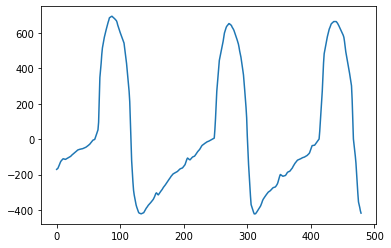

In [35]:
pd.DataFrame(datadf_info['data'].iloc[-1]).loc[:,0].plot()

In [36]:
pd.DataFrame(tmp.iloc[-1].iloc[0]).iloc[:,0].plot()

ValueError: DataFrame constructor not properly called!

In [37]:
datadf_info['data_scaled'] = result

ValueError: Length of values (695) does not match length of index (295437)

In [38]:
datadf_info

,flow_path,starttime,endtime,data,hospital_id,patient_id,wav_number,hospital_id_patient_id,instance_index,label
0,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-04-25 14:29:59.993773+09:00,2019-04-25 14:30:07.977108+09:00,"[[15.5, 507.5], [77.5, 538.5], [140.5, 570.0],...",2,002,1,2-002,0,0
1,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-04-25 14:30:07.993774+09:00,2019-04-25 14:30:15.977109+09:00,"[[234.5, 617.5], [172.5, 586.5], [109.5, 555.0...",2,002,1,2-002,1,0
2,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-04-25 14:30:15.993776+09:00,2019-04-25 14:30:23.977111+09:00,"[[47.5, 524.0], [-15.5, 492.5], [-77.5, 461.5]...",2,002,1,2-002,2,0
3,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-04-25 14:30:23.993778+09:00,2019-04-25 14:30:31.977113+09:00,"[[-140.5, 430.0], [-202.5, 399.0], [-234.5, 38...",2,002,1,2-002,3,0
4,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-04-25 14:30:31.993779+09:00,2019-04-25 14:30:39.977114+09:00,"[[-172.5, 413.5], [-109.5, 445.0], [-47.5, 476...",2,002,1,2-002,4,0
...,...,...,...,...,...,...,...,...,...,...
219,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-06-25 13:29:11.993043+09:00,2019-06-25 13:29:19.976378+09:00,"[[-305.0, 653.0], [-305.0, 653.0], [-305.0, 64...",2,010,81,2-010,295432,0
220,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-06-25 13:29:19.993045+09:00,2019-06-25 13:29:27.976380+09:00,"[[715.0, 518.0], [736.0, 530.0], [756.5, 544.0...",2,010,81,2-010,295433,0
221,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-06-25 13:29:27.993046+09:00,2019-06-25 13:29:35.976381+09:00,"[[-258.0, 620.0], [-255.0, 620.0], [-251.0, 61...",2,010,81,2-010,295434,0
222,/VOLUME/nia_vent_asynchrony/data/raw_data/base...,2019-06-25 13:29:35.993048+09:00,2019-06-25 13:29:43.976383+09:00,"[[-5.5, 418.0], [-3.0, 410.0], [-0.5, 401.5], ...",2,010,81,2-010,295435,0


In [54]:
datadf_info['data'].sample(300).apply(lambda x : np.isnan(x).sum()).value_counts()

0    300
Name: data, dtype: int64

In [53]:
datadf_info = datadf_info.drop(columns='data').rename(columns={'data_scaled':'data'})

In [55]:
datadf_info

,flow_path,starttime,endtime,hospital_id,patient_id,wav_number,hospital_id_patient_id,instance_index,data
0,/ext_ssd/nia_vent/snu/원천_csv/1-094/AWF/1-094-2...,2022-02-04 17:59:57.317517+09:00,2022-02-04 18:00:05.301010+09:00,1,094,239,1-094,0,"[[-0.0556405785238513, -0.15277775324911563], ..."
1,/ext_ssd/nia_vent/snu/원천_csv/1-094/AWF/1-094-2...,2022-02-04 18:00:05.317677+09:00,2022-02-04 18:00:13.301170+09:00,1,094,239,1-094,1,"[[-2.199993984525559, -0.02595938997561205], [..."
2,/ext_ssd/nia_vent/snu/원천_csv/1-094/AWF/1-094-2...,2022-02-04 18:00:13.317837+09:00,2022-02-04 18:00:21.301330+09:00,1,094,239,1-094,2,"[[0.170819843184988, 2.660673735428073], [0.16..."
3,/ext_ssd/nia_vent/snu/원천_csv/1-094/AWF/1-094-2...,2022-02-04 18:00:21.317997+09:00,2022-02-04 18:00:29.301490+09:00,1,094,239,1-094,3,"[[-0.0824748255934783, -0.15384618609211642], ..."
4,/ext_ssd/nia_vent/snu/원천_csv/1-094/AWF/1-094-2...,2022-02-04 18:00:29.318157+09:00,2022-02-04 18:00:37.301650+09:00,1,094,239,1-094,4,"[[-2.4556938140270854, 0.2456142112049542], [-..."
...,...,...,...,...,...,...,...,...,...
445,/ext_ssd/nia_vent/snu/원천_csv/1-093/AWF/1-093-0...,2022-01-24 10:59:17.472019+09:00,2022-01-24 10:59:25.455512+09:00,1,093,24,1-093,3157050,"[[0.9999969903812586, 0.9934308090887937], [0...."
446,/ext_ssd/nia_vent/snu/원천_csv/1-093/AWF/1-093-0...,2022-01-24 10:59:25.472179+09:00,2022-01-24 10:59:33.455672+09:00,1,093,24,1-093,3157051,"[[-1.1486511350514548, -0.0045330797580059486]..."
447,/ext_ssd/nia_vent/snu/원천_csv/1-093/AWF/1-093-0...,2022-01-24 10:59:33.472339+09:00,2022-01-24 10:59:41.455832+09:00,1,093,24,1-093,3157052,"[[5.305342458143606, 1.013029330717304], [5.01..."
448,/ext_ssd/nia_vent/snu/원천_csv/1-093/AWF/1-093-0...,2022-01-24 10:59:41.472499+09:00,2022-01-24 10:59:49.455992+09:00,1,093,24,1-093,3157053,"[[-1.3719016762377774, -0.019953476000729026],..."


In [39]:
dest_dir = '/VOLUME/nia_vent_asynchrony/data/processed_data'
nowDate = cutils.get_today_string(False)
dest_path = osp.join(dest_dir, org, f'instance_with_label_{org}_{len(datadf_info)}_{nowDate}.pkl')
print(dest_path)
datadf_info.to_pickle(dest_path)

/VOLUME/nia_vent_asynchrony/data/processed_data/aju/instance_with_label_aju_295437_2022-09-01.pkl


In [58]:
2182147/128

17048.0234375